### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
tiendas=[tienda,tienda2,tienda3,tienda4]
lista=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingreso_total_tienda=[tienda["Precio"].sum() for tienda in tiendas]
for i in range(len(tiendas)):
  print(f'El ingreso total de la {lista[i]} es ${ingreso_total_tienda[i]}')

El ingreso total de la Tienda 1 es $1150880400.0
El ingreso total de la Tienda 2 es $1116343500.0
El ingreso total de la Tienda 3 es $1098019600.0
El ingreso total de la Tienda 4 es $1038375700.0


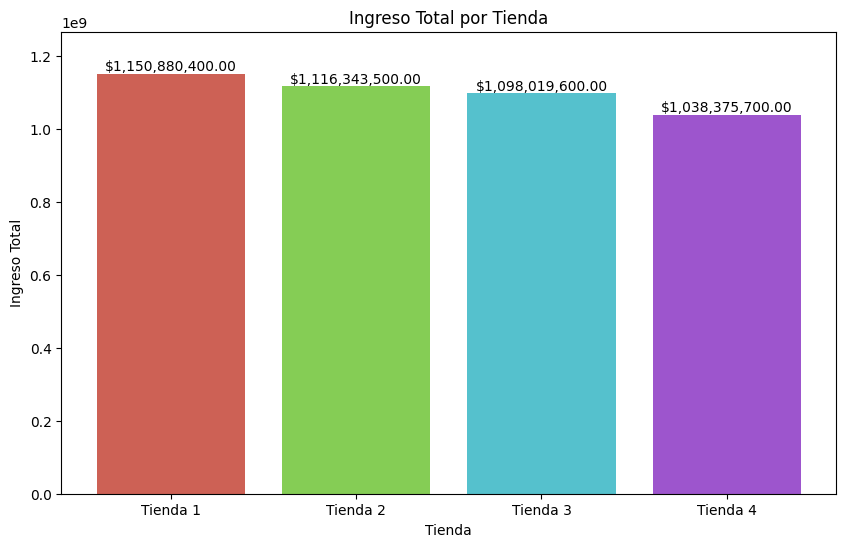

In [ ]:
plt.figure(figsize=(10,6))
colores=['#cd6155','#85cd55','#55c1cd','#9d55cd']
plt.bar_label(plt.bar(lista, ingreso_total_tienda, color=colores), labels=[f'${x:,.2f}' for x in ingreso_total_tienda])
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total')
plt.title('Ingreso Total por Tienda')
plt.ylim(0, max(ingreso_total_tienda) * 1.1)
plt.show()

# 2. Ventas por categoría


Categorías más populares en la Tienda 1:
  Categoría del Producto  Producto
7                Muebles       465
3           Electrónicos       448
5               Juguetes       324
2      Electrodomésticos       312
1   Deportes y diversión       284


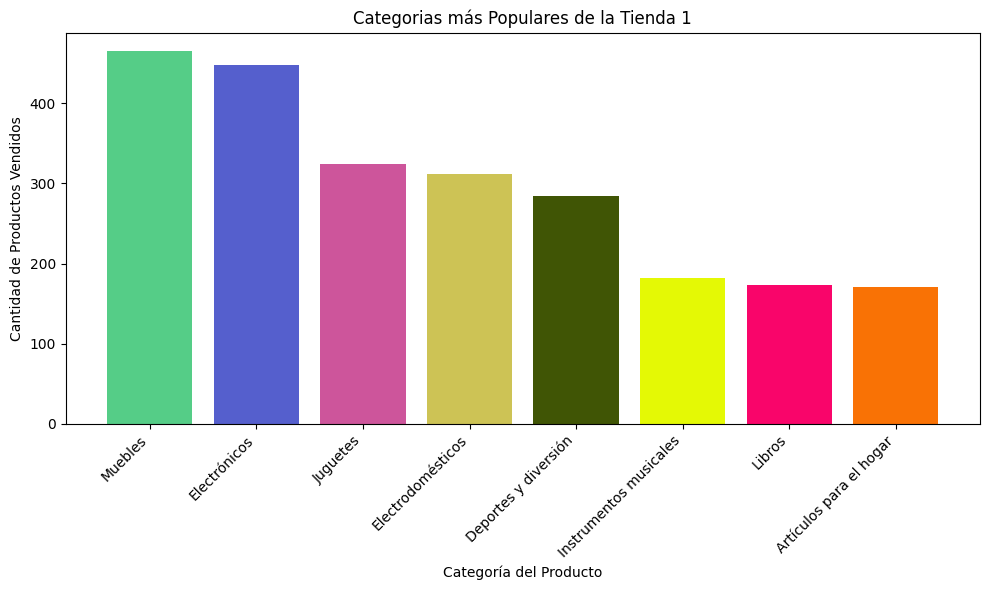


Categorías más populares en la Tienda 2:
  Categoría del Producto  Producto
7                Muebles       442
3           Electrónicos       422
5               Juguetes       313
2      Electrodomésticos       305
1   Deportes y diversión       275


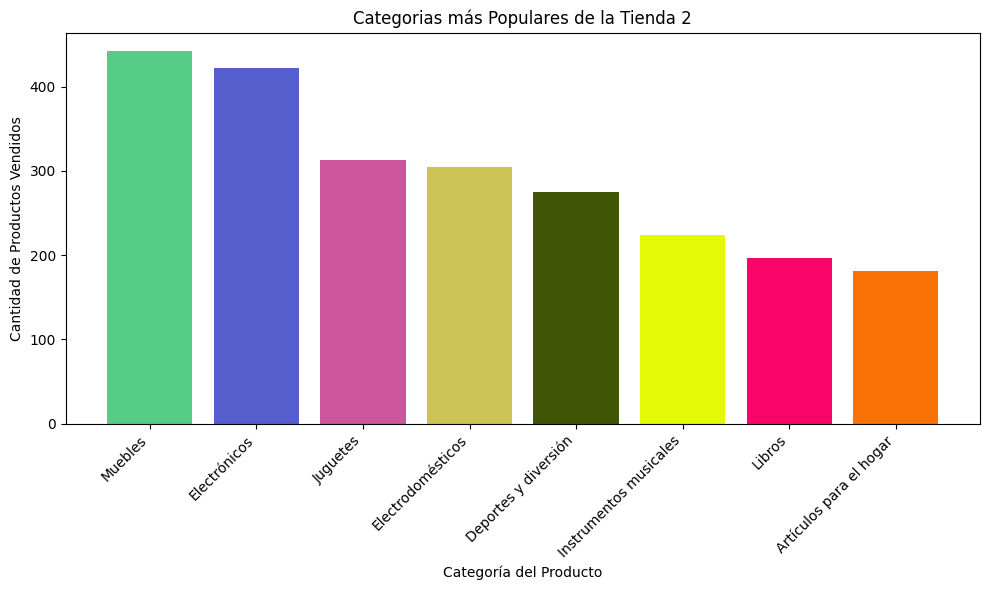


Categorías más populares en la Tienda 3:
  Categoría del Producto  Producto
7                Muebles       499
3           Electrónicos       451
5               Juguetes       315
2      Electrodomésticos       278
1   Deportes y diversión       277


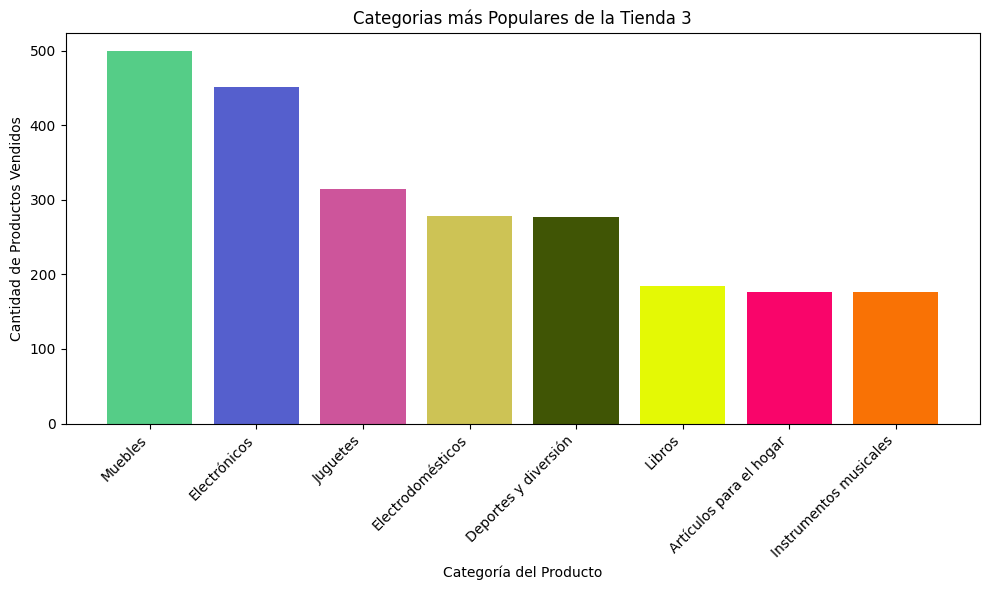


Categorías más populares en la Tienda 4:
  Categoría del Producto  Producto
7                Muebles       480
3           Electrónicos       451
5               Juguetes       338
1   Deportes y diversión       277
2      Electrodomésticos       254


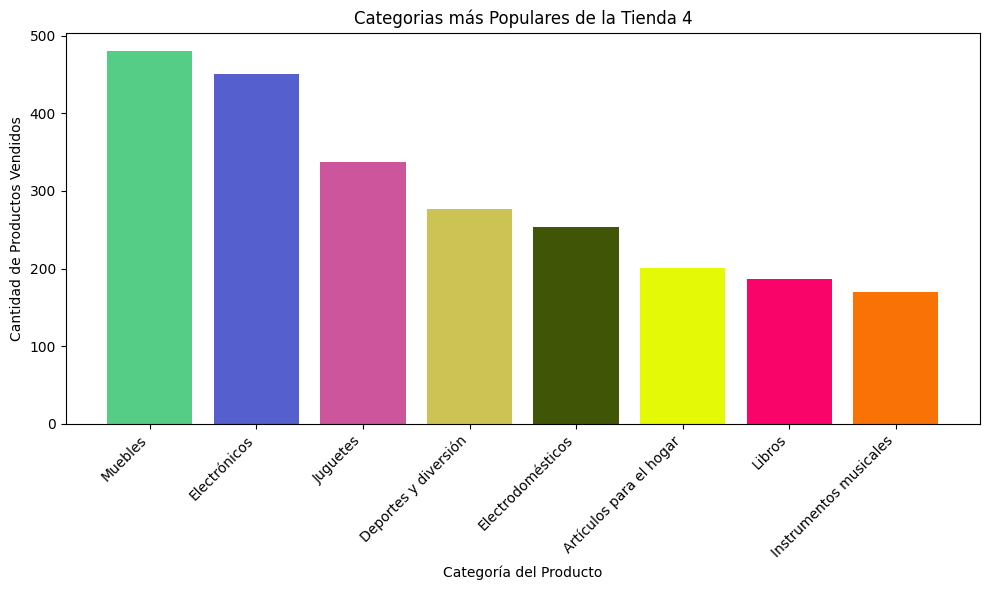

In [ ]:
for i, tienda in enumerate(tiendas):
    ventas_por_categoria = tienda.groupby('Categoría del Producto')['Producto'].count().reset_index()

    ventas_por_categoria = ventas_por_categoria.sort_values(by=['Producto'], ascending=False)

    print(f"\nCategorías más populares en la {lista[i]}:")
    print(ventas_por_categoria.head(5))

    plt.figure(figsize=(10,6))
    colores=['#55cd87','#555fcd','#cd559b','#cdc355', '#405505','#e4f905','#f9056a','#f97205']
    plt.bar(ventas_por_categoria['Categoría del Producto'], ventas_por_categoria['Producto'], color=colores)
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Cantidad de Productos Vendidos')
    plt.title(f'Categorias más Populares de la {lista[i]}')
    plt.xticks(rotation=45, horizontalalignment='right')
    plt.tight_layout()
    plt.show()


# 3. Calificación promedio de la tienda



La calificación promedio de la Tienda 1 es 3.98

La calificación promedio de la Tienda 2 es 4.04

La calificación promedio de la Tienda 3 es 4.05

La calificación promedio de la Tienda 4 es 4.00


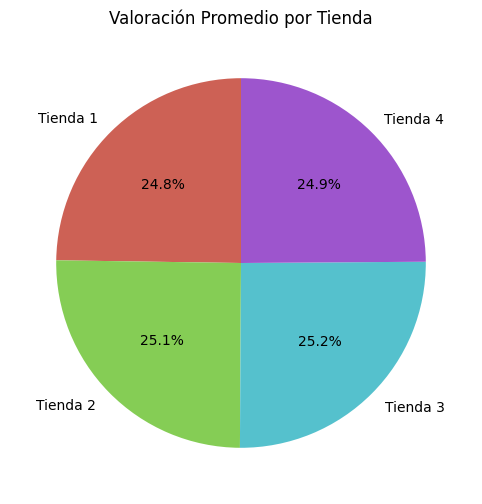

In [ ]:
calificacion_promedio_tiendas=[]
for i, tienda in enumerate(tiendas):
    calificacion_promedio = tienda['Calificación'].sum()/len(tienda)
    calificacion_promedio_tiendas.append(round(calificacion_promedio,2))
    print(f"\nLa calificación promedio de la {lista[i]} es {calificacion_promedio_tiendas[i]:.2f}")

plt.figure(figsize=(8, 6))
colores=['#cd6155','#85cd55','#55c1cd','#9d55cd']
plt.pie(calificacion_promedio_tiendas, labels=lista, autopct='%1.1f%%', startangle=90, colors=colores)
plt.title('Valoración Promedio por Tienda')
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
for i, tienda in enumerate(tiendas):
    ventas_por_producto= tienda.groupby('Producto')['Producto'].count().reset_index(name='Cantidad')
    mas_vendido = ventas_por_producto.loc[ventas_por_producto['Cantidad'].idxmax()]
    menos_vendido = ventas_por_producto.loc[ventas_por_producto['Cantidad'].idxmin()]
    print(f"\nEn la {lista[i]}:")
    print(f"\nProducto más vendido: {mas_vendido['Producto']} con {mas_vendido['Cantidad']} ventas")
    print(f"\nProducto menos vendido: {menos_vendido['Producto']} con {menos_vendido['Cantidad']} ventas")



En la Tienda 1:

Producto más vendido: Armario con 60 ventas

Producto menos vendido: Auriculares con micrófono con 33 ventas

En la Tienda 2:

Producto más vendido: Iniciando en programación con 65 ventas

Producto menos vendido: Juego de mesa con 32 ventas

En la Tienda 3:

Producto más vendido: Kit de bancas con 57 ventas

Producto menos vendido: Bloques de construcción con 35 ventas

En la Tienda 4:

Producto más vendido: Cama box con 62 ventas

Producto menos vendido: Guitarra eléctrica con 33 ventas


# 5. Envío promedio por tienda

In [ ]:
envio_promedio_tiendas=[]
for i, tienda in enumerate(tiendas):
    envio_promedio = tienda['Costo de envío'].sum()/len(tienda)
    envio_promedio_tiendas.append(round(envio_promedio,2))
    print(f"\nEnvío promedio de la {lista[i]} es ${envio_promedio_tiendas[i]:.2f}")


Envío promedio de la Tienda 1 es $26018.61

Envío promedio de la Tienda 2 es $25216.24

Envío promedio de la Tienda 3 es $24805.68

Envío promedio de la Tienda 4 es $23459.46


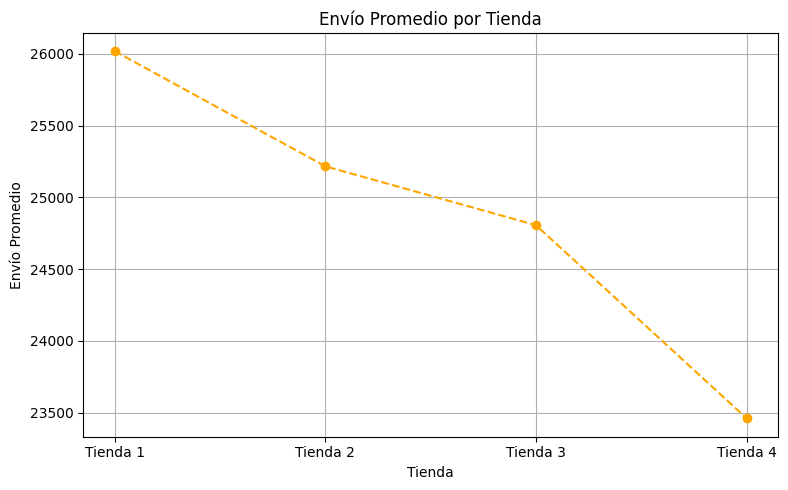

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(lista, envio_promedio_tiendas,'o--', color='orange')
plt.title('Envío Promedio por Tienda')
plt.ylabel('Envío Promedio')
plt.xlabel('Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()

#INFORME FINAL

#Introducción

El presente informe tiene como propósito exponer los resultados de un análisis detallado de las ventas y el rendimiento operativo de la cadena de tiendas Alura Store. Este estudio se llevó a cabo con el fin de proporcionar una base objetiva y fundamentada para apoyar la toma de decisiones estratégicas en relación con la optimización de recursos y mejora de la eficiencia organizacional. En particular, el análisis busca identificar cuál de las cuatro tiendas presenta un desempeño inferior de manera sostenida, considerando indicadores clave como los ingresos totales de las tiendas, las categorías de productos más y menos vendidas, las calificaciones promedio de los clientes por tienda, los productos más y menos vendidos, y el coste de envío promedio para cada tienda.

Con base en esta evaluación, se busca recomendar el cierre de la tienda menos rentable, priorizando la sostenibilidad a largo plazo del negocio y el fortalecimiento de aquellas unidades con mayor potencial de crecimiento.


#Análisis de datos

##•	Ingresos totales de cada tienda:

| Tienda  | Ingreso Total $ |
| :--- | :---: |
| Tienda 1 | 1,150,880,400.0 |
| Tienda 2 | 1,116,343,500.0 |
| Tienda 3 | 1,098,019,600.0 |
| Tienda 4 | 1,038,375,700.0 |


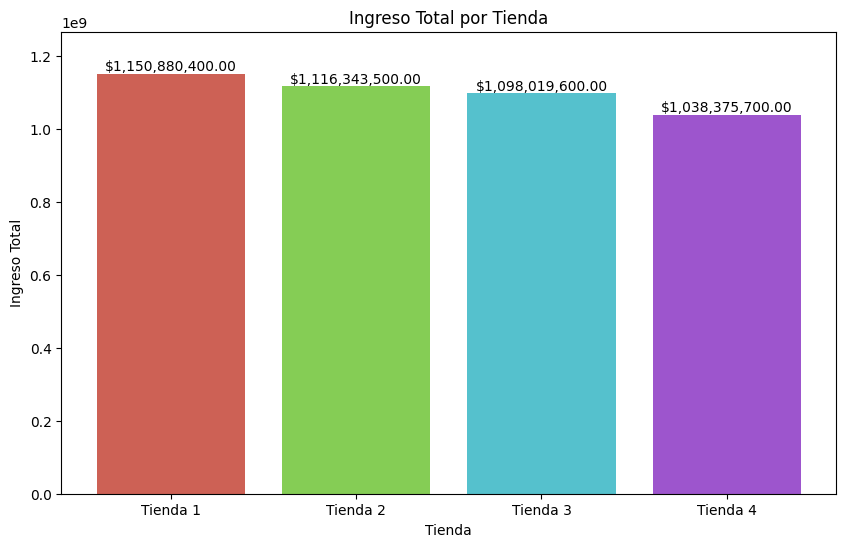




##•	Las categorías de productos más y menos vendidas.

      *Categorías más populares en la Tienda 1:

| Categoría del producto  | Producto  |
| :--- | :---: |
| 7                Muebles | 465 |
| 3           Electrónicos | 448 |
| 5               Juguetes | 324 |
| 2      Electrodomésticos | 312 |
| 1   Deportes y diversión | 284 |


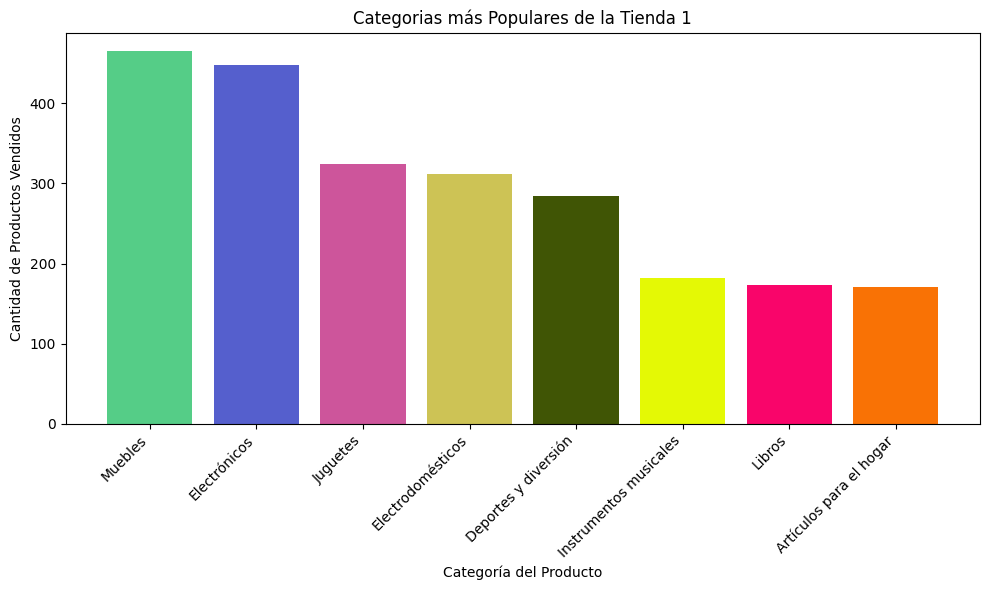


      *Categorías más populares en la Tienda 2:

| Categoría del producto  | Producto  |
| :--- | :---: |
| 7                Muebles | 442 |
| 3           Electrónicos | 422 |
| 5               Juguetes | 313 |
| 2      Electrodomésticos | 305 |
| 1   Deportes y diversión | 275 |

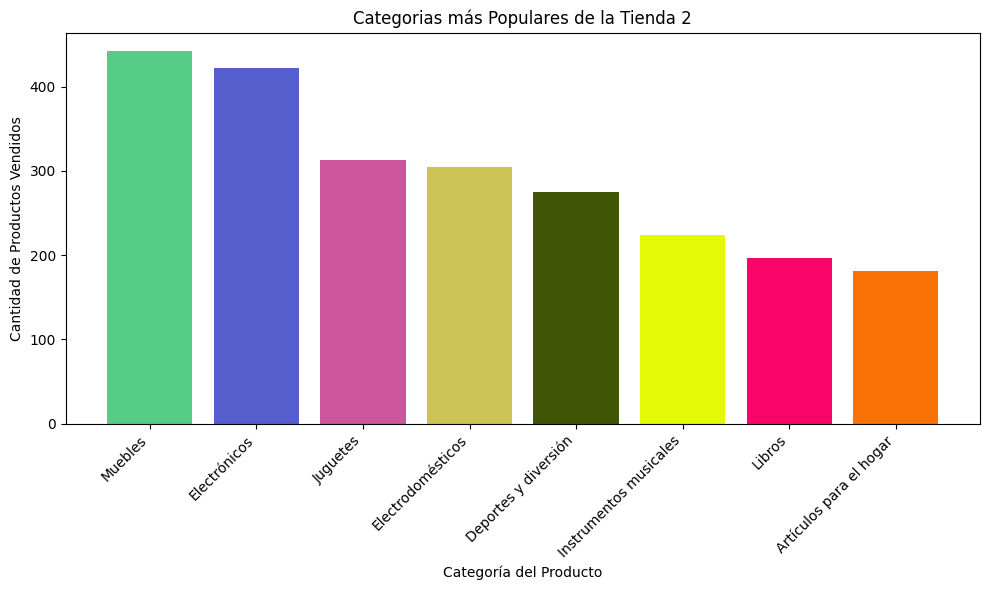


      *Categorías más populares en la Tienda 3:

| Categoría del producto  | Producto  |
| :--- | :---: |
| 7                Muebles | 499 |
| 3           Electrónicos | 451 |
| 5               Juguetes | 315 |
| 2      Electrodomésticos | 278 |
| 1   Deportes y diversión | 277 |


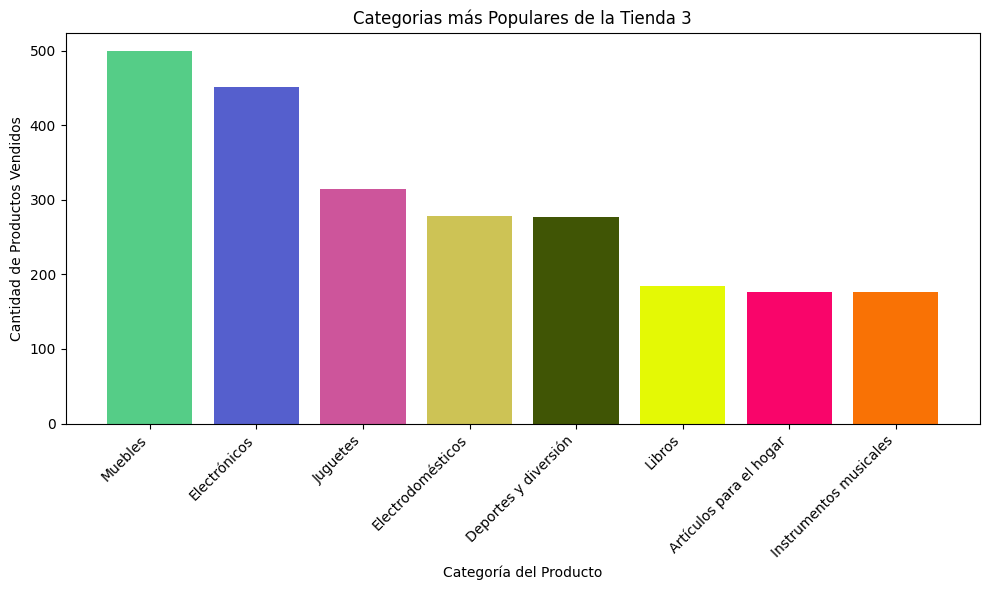

      *Categorías más populares en la Tienda 4:

| Categoría del producto  | Producto  |
| :--- | :---: |
| 7                Muebles | 480 |
| 3           Electrónicos | 451 |
| 5               Juguetes | 338 |
| 1   Deportes y diversión | 277 |
| 2      Electrodomésticos | 254 |

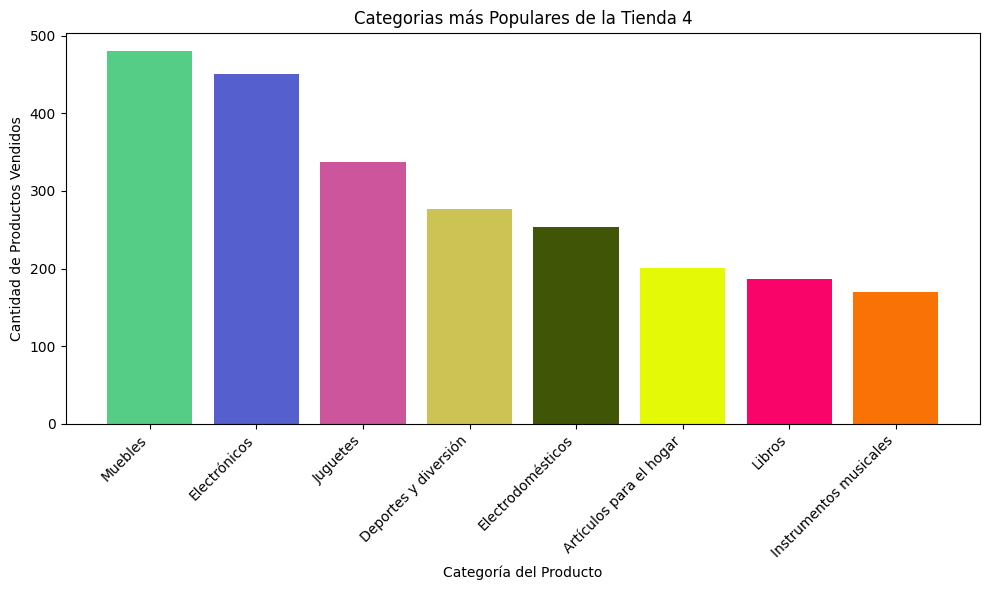


##•	Las calificaciones promedio de los clientes por tienda.

| Tienda  | Calificación Promedio |
| :--- | :---: |
| Tienda 1 | 3.98 |
| Tienda 2 | 4.04 |
| Tienda 3 | 4.05 |
| Tienda 4 | 4.00 |

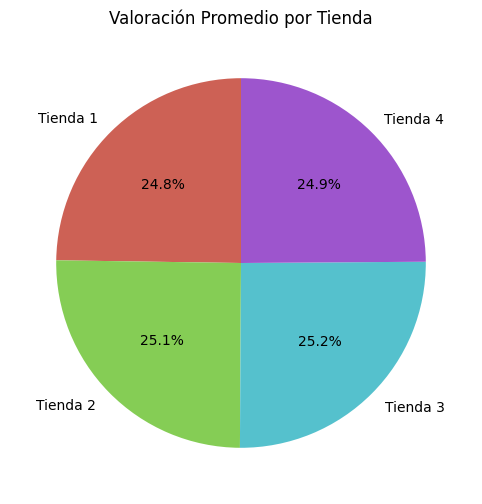


##•	Los productos más y menos vendidos.

      *En la Tienda 1:

| Producto  | Cantidad  |
| :--- | :---: |
| Armario | 60 |
| Auriculares con micrófono | 33 |


      *En la Tienda 2:

| Producto  | Cantidad  |
| :--- | :---: |
| Iniciando en programación | 65 |
| Juego de mesa | 32 |


      *En la Tienda 3:

| Producto  | Cantidad  |
| :--- | :---: |
| Kit de bancas | 57 |
| Bloques de construcción | 35 |


      *En la Tienda 4:

| Producto  | Cantidad  |
| :--- | :---: |
| Cama box | 62 |
| Guitarra eléctrica | 33 |


##•	El coste de envío promedio para cada tienda.


| Tienda  | Costo envío Promedio $ |
| :--- | :---: |
| Tienda 1 | 26,018.61 |
| Tienda 2 | 25,216.24 |
| Tienda 3 | 24,805.68 |
| Tienda 4 | 23,459.46 |


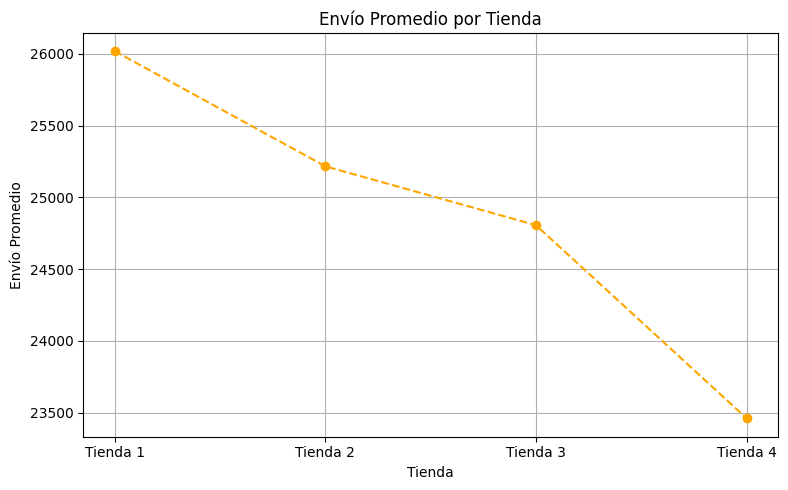


#Conclusión

Con base en los datos analizados del desempeño de la cadena de tiendas Alura Store, se concluye que la tienda 4 debe ser considerada para su venta o cierre. Esta decisión se justifica principalmente por presentar los ingresos por ventas más bajos del conjunto, lo que afecta directamente la rentabilidad del negocio. Además, la valoración de los clientes es la segunda más baja, lo cual refleja deficiencias en la atención, calidad del servicio o experiencia de compra.
No obstante, la tienda 4 también posee algunas fortalezas, como sus bajos costos de envío, que podrían atribuirse a su ubicación geográfica o a una operación logística eficiente.
Se recomienda evaluar posibles estrategias de mejoramiento para optimizar los recursos de la empresa, como reestructurar el equipo de atención al cliente e implementar programas de capacitación, fortalecer las campañas de marketing local para incrementar el tráfico de clientes, revisar el surtido de productos y alinear la oferta con las necesidades específicas del mercado local y aprovechar su ventaja logística para ofrecer entregas más rápidas o económicas como diferenciador competitivo.


